<a href="https://colab.research.google.com/github/Ayuningtyas65/MSIB/blob/main/Self_Learning_ML_1_Korelasi_dan_Regresi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Karena nilai dw (2.147) berada diantara nilai du (1.628) dan 4-du (2.372), maka **tidak ada masalah autokorelasi**.

T

# Self-Learning ML-1: FGD

Download dataset [di sini](https://drive.google.com/file/d/1OjcfLYS5NI2eVHJppg_BGd-fcN5Jj4fo/view?usp=sharing).

1. Buat model Regresi Linear dari tersebut
2. Lakukan Uji Asumsi Klasik pada model
3. Simpulkan hasil Uji Asumsi Klasik
4. Kumpulkan SL ke HC!

Tri Mulyani Ayuningtyas_JumaTec

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

**UJI ASUMSI KLASIK PADA LINIER REGRESI**

In [ ]:
# Download dataset
! wget -O kc_house_3_features.csv https://raw.githubusercontent.com/latief30/Latihan/main/Dataset/kc_house_3_features.csv

--2022-09-17 04:10:36--  https://raw.githubusercontent.com/latief30/Latihan/main/Dataset/kc_house_3_features.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2532 (2.5K) [text/plain]
Saving to: ‘kc_house_3_features.csv’

kc_house_3_features 100%[===================>]   2.47K  --.-KB/s    in 0s      

2022-09-17 04:10:36 (26.3 MB/s) - ‘kc_house_3_features.csv’ saved [2532/2532]



In [ ]:
# Load Dataset
data = pd.read_csv('kc_house_3_features.csv')
data.head()

,sqft_living,sqft_living15,sqft_above,price
0,1180,1340,1180,221900.0
1,2570,1690,2170,538000.0
2,770,2720,770,180000.0
3,1960,1360,1050,604000.0
4,1680,1800,1680,510000.0


In [ ]:
# Informasi terkait dataset (metadata)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sqft_living    100 non-null    int64  
 1   sqft_living15  100 non-null    int64  
 2   sqft_above     100 non-null    int64  
 3   price          100 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 3.2 KB


**Hubungan Linier antara tiap feature dengan label (X dan Y)**

In [ ]:
# Analisis Korelasi
data.corr()

,sqft_living,sqft_living15,sqft_above,price
sqft_living,1.000000,0.774798,0.837615,0.650602
sqft_living15,0.774798,1.000000,0.755848,0.648145
sqft_above,0.837615,0.755848,1.000000,0.515989
price,0.650602,0.648145,0.515989,1.000000


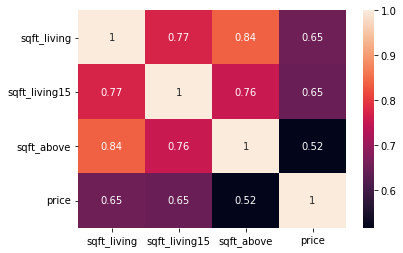

In [ ]:
# Visualisasi menggunakan hitmap
sns.heatmap(data.corr(), annot=True)
plt.show()

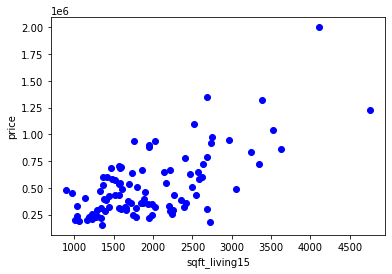

In [ ]:
# Visualisasi hubungan antara sqft_living15 dan price
plt.scatter(data['sqft_living15'], data['price'], color='blue')
plt.xlabel("sqft_living15")
plt.ylabel("price")
plt.show()

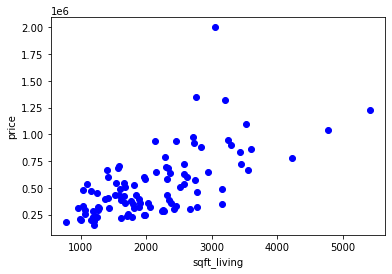

In [ ]:
# Visualisasi hubungan antara sqft_living dan price
plt.scatter(data['sqft_living'], data['price'], color='blue')
plt.xlabel("sqft_living")
plt.ylabel("price")
plt.show()

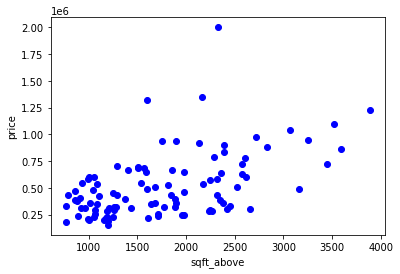

In [ ]:
# Visualisasi hubungan antara sqft_above dan price
plt.scatter(data['sqft_above'], data['price'], color='blue')
plt.xlabel("sqft_above")
plt.ylabel("price")
plt.show()

**SPLITTING DATA MENJADI DATA TRAIN DAN TEST**

In [ ]:
features =['sqft_living', 'sqft_living15', 'sqft_above']
X = data[features].values
Y = data.price

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=23)

In [ ]:
# Periksa bentuk data train dan test
print('Data Train :', end='')
print(X_train.shape, Y_train.shape)
print('\nData Test : ', end='')
print(X_test.shape, Y_test.shape)

Data Train :(80, 3) (80,)

Data Test : (20, 3) (20,)


**MODELLING**

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

LinearRegression()

**UJI NORMALITAS**

hasil uji kolmogorov Smirnov 
 KstestResult(statistic=0.1323167164684002, pvalue=0.11080879390488378)


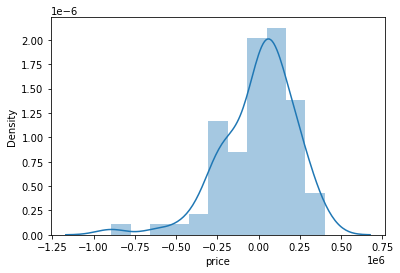

In [ ]:
y_predtrain = lin_reg.predict(X_train)       #Prediksi model data train
err = y_predtrain - Y_train                  #Residualnya data train
sns.distplot(err)                            #membuat plot histogramnya

z_er = stats.zscore(err)
norm_er = stats.kstest(z_er, 'norm', )       #uji komogorov-smirnov
print('hasil uji kolmogorov Smirnov \n', norm_er)

Ho : data = berdistribusi normal

Ha : data tidak berdistribusi normal

Karena pvalue > 0.05, maka Ho diterima.

Plot histogram yang membentuk lonceng dan puncaknya cenderung ke tengah juga mendukung bahwa **errornya sudah berdistribusi normal**.

**MENGECEK TIDAK TERJADINYA HETEROSKEDASTISITAS**

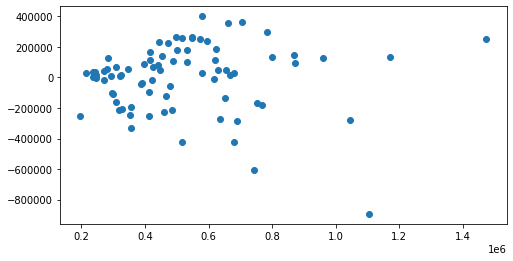

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(y_predtrain, err)
plt.show()

Artinya nilai prediksi kita tidak terganggu oleh errornya atau **tidak terjadi heteroskedastisitas**.

**MENGECEK TIDAK TERJADINYA MULTIKOLINEARITAS (KHUSUS REGRESI BERGANDA)**

In [ ]:
vif = [variance_inflation_factor(X_train, i) for i in range(len(X_train.T))]
pd.DataFrame({'VIF': vif[0:]}, index=features).T

,sqft_living,sqft_living15,sqft_above
VIF,26.284273,19.275041,24.946889


Terjadi multikolinearitas dikarenakan nilai VIP > 10

**MENGECEK TIDAK TERJADINYA AUTOKORELASI**

In [ ]:
X_constant = sm.add_constant(X_train)
linreg = sm.OLS(Y_train, X_constant).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     29.36
Date:                Sat, 17 Sep 2022   Prob (F-statistic):           1.04e-12
Time:                        04:11:29   Log-Likelihood:                -1097.3
No. Observations:                  80   AIC:                             2203.
Df Residuals:                      76   BIC:                             2212.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.547e+04   7.54e+04     -1.266      0.209   -2.46e+05    5.47e+04
x1           164.9679     56.600      2.915      0.005      52.239     277.697
x2           233.7268     57.513      4.064      0.000     119.180     348.274
x3          -112.2904     67.313     -1.668      0.099    -246.356      21.775
==============================================================================
Omnibus:                       22.442   Durbin-Watson:                   1.773
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.156
Skew:                           1.110   Prob(JB):                     1.41e-08
Kurtosis:                       5.433   Cond. No.                     1.08e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**VISUALISASI HASIL PREDIKSI**

In [ ]:
y_predtest = lin_reg.predict(X_test)

# MSE
MSE_train = mean_squared_error(Y_train, y_predtrain)
print('Nilai MSE data training = ', MSE_train)
MSE_test = mean_squared_error(Y_test, y_predtest)
print('Nilai MSE data testing = ', MSE_test)

# RMSE
RMSE_train = np.sqrt(MSE_train)
print('Nilai RMSE data training =', RMSE_train)
RMSE_test = np.sqrt(MSE_test)
print('Nilai RMSE data testing = ', RMSE_test)

# MAE
MAE_train = mean_absolute_error(Y_train, y_predtrain)
print('Nilai MAE data training =', MAE_train)
MAE_test = mean_absolute_error(Y_test, y_predtest)
print('Nilai MAE data testing =', MAE_test)

Nilai MSE data training =  47994626311.29503
Nilai MSE data testing =  44047671395.58065
Nilai RMSE data training = 219076.75894830795
Nilai RMSE data testing =  209875.37110290155
Nilai MAE data training = 164060.7384825786
Nilai MAE data testing = 176540.63195959709


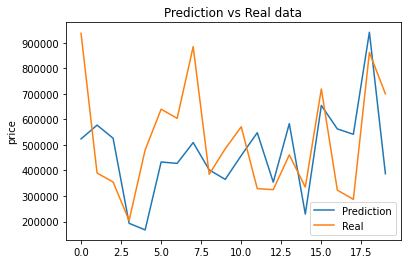

In [ ]:
#Plotting data prediksi dan testing untuk membandingkan
plt.plot(y_predtest)
plt.plot(Y_test.values)

# to give title to the graph/figure
plt.title('Prediction vs Real data')

# Add y label
plt.ylabel("price")

# Adding legend to the plot/graph/figure
plt.legend(labels=['Prediction',"Real"],loc='Lower right')

**KOEFISION DETERMINASI**

In [ ]:
print(f'R^2 score : {lin_reg.score(X, Y)}')

R^2 score : 0.48574851811867203


Terlihat nilai R2 = 0.4857, ini merupakan nilai yang kurang.

Nilai ini menunjukkan 48.57% dari profit dapat diprediksi oleh sqft_living, sqft_Living15 dan sqft_above

Sisanya (51.43%) dipengaruhi faktor lain yang tidak ada di model ini.

**UJI SIMULTAN, PARSIAL, DAN BESAR PENGARUH FEATURE**

In [ ]:
# uji ini membutuhkan model linreg pada uji Autikorelasi (bukan model lin_reg)
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     29.36
Date:                Sat, 17 Sep 2022   Prob (F-statistic):           1.04e-12
Time:                        04:11:41   Log-Likelihood:                -1097.3
No. Observations:                  80   AIC:                             2203.
Df Residuals:                      76   BIC:                             2212.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.547e+04   7.54e+04     -1.266      0.209   -2.46e+05    5.47e+04
x1           164.9679     56.600      2.915      0.005      52.239     277.697
x2           233.7268     57.513      4.064      0.000     119.180     348.274
x3          -112.2904     67.313     -1.668      0.099    -246.356      21.775
==============================================================================
Omnibus:                       22.442   Durbin-Watson:                   1.773
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.156
Skew:                           1.110   Prob(JB):                     1.41e-08
Kurtosis:                       5.433   Cond. No.                     1.08e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**KSEIMPULAN**

In [ ]:
sqft_living = float(input('Input sqft_living \t= '))
sqft_living15 = float(input('Input sqft_living15\t= '))
sqft_above = float(input('Input sqft_above\t= '))
data_baru = [[sqft_living, sqft_living15, sqft_above]]

# Prediksi data baru menggunakan model Regresi Linear
hasil_prediksi = lin_reg.predict(data_baru)
hasil_prediksi = float(hasil_prediksi)

# Cetak hasil prediksi (Profit)
print('\nPrediksi Profit yang akan didapat adalah', hasil_prediksi)

Input sqft_living 	= 770
Input sqft_living15	= 7270
Input sqft_above	= 770

Prediksi Profit yang akan didapat adalah 1644283.7442436372
